In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image,y_train_label),(x_test_image,y_test_label) = mnist.load_data()

In [3]:
x_Train = x_train_image.reshape(60000,784).astype('float32')
x_Test = x_test_image.reshape(10000,784).astype('float32')

In [4]:
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

In [5]:
y_Train_OneHot=np_utils.to_categorical(y_train_label)
y_Test_OneHot=np_utils.to_categorical(y_test_label)

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

In [8]:
model.add(Dense(units=256,input_dim=784,kernel_initializer='normal',activation='relu'))

In [9]:
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [10]:
print model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530.0
Trainable params: 203,530
Non-trainable params: 0.0
_________________________________________________________________
None


In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
train_history = model.fit(x=x_Train_normalize,y=y_Train_OneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
2s - loss: 0.4380 - acc: 0.8829 - val_loss: 0.2179 - val_acc: 0.9408
Epoch 2/10
2s - loss: 0.1909 - acc: 0.9456 - val_loss: 0.1555 - val_acc: 0.9558
Epoch 3/10
2s - loss: 0.1353 - acc: 0.9616 - val_loss: 0.1258 - val_acc: 0.9646
Epoch 4/10
2s - loss: 0.1025 - acc: 0.9703 - val_loss: 0.1120 - val_acc: 0.9682
Epoch 5/10
2s - loss: 0.0809 - acc: 0.9772 - val_loss: 0.0978 - val_acc: 0.9716
Epoch 6/10
2s - loss: 0.0658 - acc: 0.9819 - val_loss: 0.0934 - val_acc: 0.9723
Epoch 7/10
2s - loss: 0.0543 - acc: 0.9853 - val_loss: 0.0909 - val_acc: 0.9738
Epoch 8/10
2s - loss: 0.0458 - acc: 0.9876 - val_loss: 0.0830 - val_acc: 0.9768
Epoch 9/10
2s - loss: 0.0378 - acc: 0.9903 - val_loss: 0.0821 - val_acc: 0.9760
Epoch 10/10
2s - loss: 0.0315 - acc: 0.9918 - val_loss: 0.0810 - val_acc: 0.9762


In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoche')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

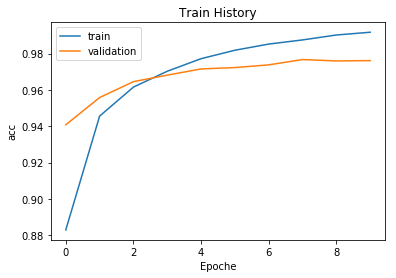

In [14]:
show_train_history(train_history,'acc','val_acc')

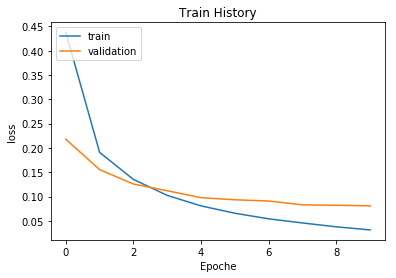

In [15]:
show_train_history(train_history,'loss','val_loss')

In [16]:
scores = model.evaluate(x_Test_normalize,y_Test_OneHot)
print
print 'accuracy',scores[1]

 9152/10000 [==========================>...] - ETA: 0s
accuracy 0.976


In [17]:
prediction=model.predict_classes(x_Test)

 8736/10000 [=========================>....] - ETA: 0s

In [18]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [19]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25 : num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title="label="+str(labels[idx])
        if len(prediction)>0:
            title="label="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show() 

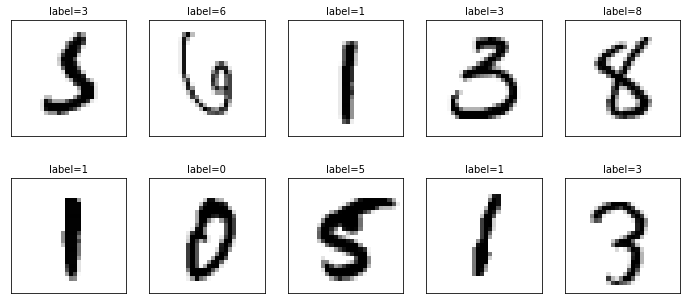

In [20]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

In [21]:
import pandas as pd
pd.crosstab(y_test_label,prediction,rownames=['labels'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
labels,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,6,0,1011,0,1,0,2,4,8,0
3,0,0,5,991,0,1,0,4,5,4
4,2,0,5,1,960,0,3,0,3,8
5,3,0,0,14,1,854,7,1,9,3
6,5,3,3,1,3,3,939,0,1,0
7,0,5,12,6,1,0,0,989,6,9
8,5,0,3,6,2,1,1,2,953,1


In [23]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction})
df[:5]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [29]:
df[(df.label==5)&(df.predict==3)]


,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
4271,5,3
4355,5,3


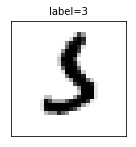

In [30]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340,num=1)

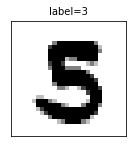

In [31]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=1003,num=1)